In [ ]:
def psnr(im1,im2):
    diff = numpy.abs(im1 - im2)
    rmse = numpy.sqrt(diff).sum()
    psnr = 20*numpy.log10(255/rmse)
    return psnr

In [ ]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
  
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-f", "--first", required=True,
help="first input image")
ap.add_argument("-s", "--second", required=True,
help="second")
args = vars(ap.parse_args())
# load the two input images
imageA = cv2.imread(args["first"])
imageB = cv2.imread(args["second"])
  
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned


###########################
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

In [39]:
import os
import numpy as np
from PIL import Image
import numpy
def ssim(img1, img2, cs_map=False):
    """Return the Structural Similarity Map corresponding to input images img1 
    and img2 (images are assumed to be uint8)
    
    This function attempts to mimic precisely the functionality of ssim.m a 
    MATLAB provided by the author's of SSIM
    https://ece.uwaterloo.ca/~z70wang/research/ssim/ssim_index.m
    """
    img1 = img1.astype(numpy.float64)
    img2 = img2.astype(numpy.float64)
    size = 11
    sigma = 1.5
    window = gauss.fspecial_gauss(size, sigma)
    K1 = 0.01
    K2 = 0.03
    L = 255 #bitdepth of image
    C1 = (K1*L)**2
    C2 = (K2*L)**2
    mu1 = signal.fftconvolve(window, img1, mode='valid')
    mu2 = signal.fftconvolve(window, img2, mode='valid')
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2
    sigma1_sq = signal.fftconvolve(window, img1*img1, mode='valid') - mu1_sq
    sigma2_sq = signal.fftconvolve(window, img2*img2, mode='valid') - mu2_sq
    sigma12 = signal.fftconvolve(window, img1*img2, mode='valid') - mu1_mu2
    if cs_map:
        return (((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2)), 
                (2.0*sigma12 + C2)/(sigma1_sq + sigma2_sq + C2))
    else:
        return ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
                    (sigma1_sq + sigma2_sq + C2))

def msssim(img1, img2):
    """This function implements Multi-Scale Structural Similarity (MSSSIM) Image 
    Quality Assessment according to Z. Wang's "Multi-scale structural similarity 
    for image quality assessment" Invited Paper, IEEE Asilomar Conference on 
    Signals, Systems and Computers, Nov. 2003 
    
    Author's MATLAB implementation:-
    http://www.cns.nyu.edu/~lcv/ssim/msssim.zip
    """
    level = 5
    weight = numpy.array([0.0448, 0.2856, 0.3001, 0.2363, 0.1333])
    downsample_filter = numpy.ones((2, 2))/4.0
    im1 = img1.astype(numpy.float64)
    im2 = img2.astype(numpy.float64)
    mssim = numpy.array([])
    mcs = numpy.array([])
    for l in range(level):
        ssim_map, cs_map = ssim(im1, im2, cs_map=True)
        mssim = numpy.append(mssim, ssim_map.mean())
        mcs = numpy.append(mcs, cs_map.mean())
        filtered_im1 = ndimage.filters.convolve(im1, downsample_filter, 
                                                mode='reflect')
        filtered_im2 = ndimage.filters.convolve(im2, downsample_filter, 
                                                mode='reflect')
        im1 = filtered_im1[::2, ::2]
        im2 = filtered_im2[::2, ::2]
    return (numpy.prod(mcs[0:level-1]**weight[0:level-1])*
                    (mssim[level-1]**weight[level-1]))
image = Image.open('/Users/wendy/Desktop/WechatIMG42.jpeg')
iii = np.array(image)
image_pil = Image.open('/Users/wendy/Desktop/WechatIMG43.pic')
ooo= np.array(image_pil)
a=msssim(iii,ooo)

NameError: global name 'gauss' is not defined

In [2]:
import numpy as np
data_8=np.load("/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/input8_8.npy")
data_32=np.load("/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/output32_32.npy")

In [3]:
def reshape(data,index,shape,n):
    data_reshape=[]
    for i in range(len(data)):
        for j in range(len(data[index])):
            
                s=data[i][j][index]
                data_reshape.append(float(s))
    
    sample=np.reshape(data_reshape,shape) 
    return sample

from numpy import linalg as la
def get_eig(data,shape,n):
    eig_val=[]
    eig_vec=[]
    for i in range(len(data_8[0][0][0])):
        L=reshape(data,i,shape,n)
        L=L/255-0.5
        
        U,sigma,VT=la.svd(L)
        eig_val_8=sigma**2/(n-1)
        eig_vec_8=VT
        eig_val.append(eig_val_8)
        eig_vec.append(eig_vec_8)
    return eig_val,eig_vec
        
ori_val=[]
ori_vec=[]
reshaped_val=[]
reshaped_vec=[]
for i in range(len(data_8)):
    eig_val_8,eig_vec_8=get_eig(data_8[i],(8,8),8)
    #print eig_val_8
    eig_val_32,eig_vec_32=get_eig(data_32[i],(32,32),32)
    reshaped_val.append(eig_val_8)
    reshaped_vec.append(eig_vec_8)
    ori_val.append(eig_val_32)
    ori_vec.append(eig_vec_32)

In [5]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(reshaped_vec,ori_vec,test_size=0.4, random_state=0)
train8_vec=np.array(trainx)
train32_vec=np.array(trainy)
train32_vec=np.real(trainy)
test8_vec=np.array(testx)
test32_vec=np.array(testy)
test32_vec=np.real(testy)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train8_vec.npy',train8_vec)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train32_vec.npy',train32_vec)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/test8_vec.npy',test8_vec)
np.save('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/test32_vec.npy',test32_vec)

In [46]:
a=np.load('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/err_list3.npy')
c=np.load('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/C_list1.npy')
l=np.load('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/lr_list1.npy')

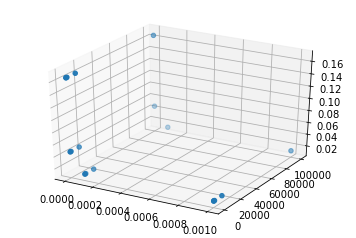

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')   
ax.scatter(l, c, a)  
plt.show()

[ 0.01411323  0.01407647  0.01401082  0.01405613  0.01407347]


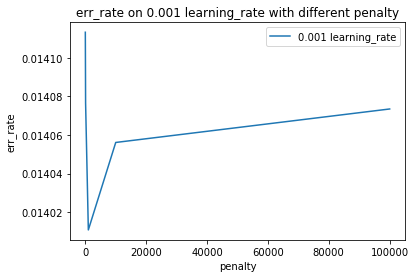

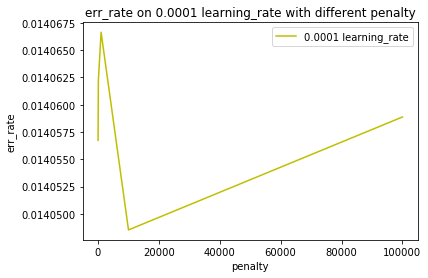

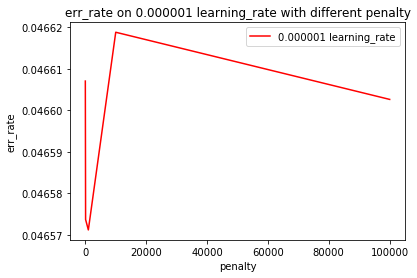

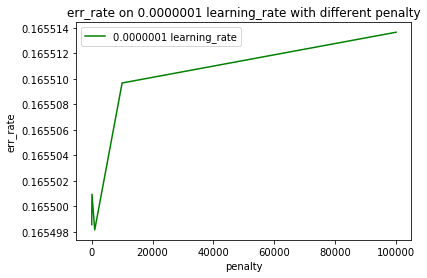

In [48]:
C=[10,100,1000,10000,100000]
print a[0:5]
plt.title('err_rate on 0.001 learning_rate with different penalty')
plt.xlabel('penalty')
plt.ylabel('err_rate')
plt.plot(C, a[0:5],label='0.001 learning_rate')
plt.legend()
plt.show()

plt.title('err_rate on 0.0001 learning_rate with different penalty')
plt.xlabel('penalty')
plt.ylabel('err_rate')
plt.plot(C, a[5:10],"y",label='0.0001 learning_rate')
plt.legend()
plt.show()
plt.title('err_rate on 0.000001 learning_rate with different penalty')
plt.xlabel('penalty')
plt.ylabel('err_rate')
plt.plot(C, a[10:15],"r",label='0.000001 learning_rate')
plt.legend()
plt.show()
plt.title('err_rate on 0.0000001 learning_rate with different penalty')
plt.xlabel('penalty')
plt.ylabel('err_rate')
plt.plot(C, a[15:20],"g",label='0.0000001 learning_rate')
plt.legend()
plt.show()

In [24]:
print a[5:10]

[ 0.0095996   0.00960298  0.00960528  0.00959495  0.00959789]


In [35]:
np.load('/Users/wendy/Documents/2017 Fall/CS 534/project/npy_data/train_val_1.npy')

array([[  1.91356006e+00,   6.89727401e-01,   2.62890520e-01, ...,
          2.17940937e-05,   6.80393787e-06,   8.13028635e-07],
       [  1.66358950e+00,   5.99627516e-01,   2.28548828e-01, ...,
          1.89471061e-05,   5.91513163e-06,   7.06821768e-07],
       [  7.00352909e-01,   2.52436598e-01,   9.62165464e-02, ...,
          7.97652358e-06,   2.49020545e-06,   2.97564201e-07],
       ..., 
       [  1.75084538e+00,   6.31078197e-01,   2.40536297e-01, ...,
          1.99408887e-05,   6.22538244e-06,   7.43894827e-07],
       [  9.94495597e-01,   3.58457975e-01,   1.36626736e-01, ...,
          1.13266004e-05,   3.53607206e-06,   4.22538814e-07],
       [  2.21851288e+00,   7.99645204e-01,   3.04785837e-01, ...,
          2.52672904e-05,   7.88824148e-06,   9.42596232e-07]])

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
a=scipy.misc.imread("/Users/wendy/Desktop/vector.bmp")

In [56]:
import imageio
im = imageio.imread("/Users/wendy/Desktop/vector.bmp")

ImportError: No module named imageio